In [1]:
# learn transition for game of life using single hidden layer MLP
import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier

In [2]:
text_file = open("train.txt", "r")
lines = text_file.readlines()
text_file.close()
label = []
target = []
for line in lines:
  [state, a] = line.split("\t")
  s = eval(state)
  s.append(np.sum(s) / 10.)
  label.append(s)
  target.append(eval(a))
label = np.array(label)
target = np.array(target)

In [3]:
print(label.shape, target.shape)

(512, 10) (512,)


In [4]:
def find_num_correct(N=512):
  classifier = MLPClassifier(max_iter=2000, hidden_layer_sizes=(100,))
  indices = np.random.choice(512, N, replace=False)
  classifier.fit(label[indices], target[indices])
  predict = classifier.predict(label)
  return np.sum(predict == target)

In [5]:
find_num_correct(512)

512

In [6]:
find_num_correct(100)

409

In [7]:
sample_sizes = np.arange(int(512/16))*16+16

In [8]:
num_correct = []
stdev = []
for sample_size in sample_sizes:
  nums = []
  for i in range(16):
    num = find_num_correct(sample_size)
    nums.append(num)
  avg_num = np.mean(nums)
  std = np.std(nums)
  print(sample_size, avg_num, std)
  stdev.append(std)
  num_correct.append(avg_num)

16 369.375 15.156990961269324
32 376.3125 7.547505796619172
48 388.5 10.781929326423912
64 393.25 14.92690523852818
80 399.0 14.252192813739224
96 421.8125 12.96735685288255
112 425.0625 12.695810086402522
128 432.125 10.896530411098755
144 442.3125 15.222182621096096
160 450.625 8.146126380065558
176 460.6875 11.043769453859493
192 468.125 10.117281008255134
208 393.5625 11.494394014040061
224 425.1875 23.313672892746865
240 475.8125 31.613325414293257
256 494.375 8.053531833922307
272 499.4375 5.326452266753171
288 501.0625 6.932430580251056
304 504.5625 5.361538375317293
320 504.0625 5.0925036818837945
336 505.625 3.8547859862773186
352 506.8125 4.018997853943194
368 509.125 2.521780125229002
384 509.0625 2.276750700010873
400 509.9375 2.164161211647598
416 431.875 47.201529371409144
432 505.75 23.43741666651852
448 511.875 0.33071891388307384
464 511.9375 0.24206145913796356
480 512.0 0.0
496 512.0 0.0
512 512.0 0.0


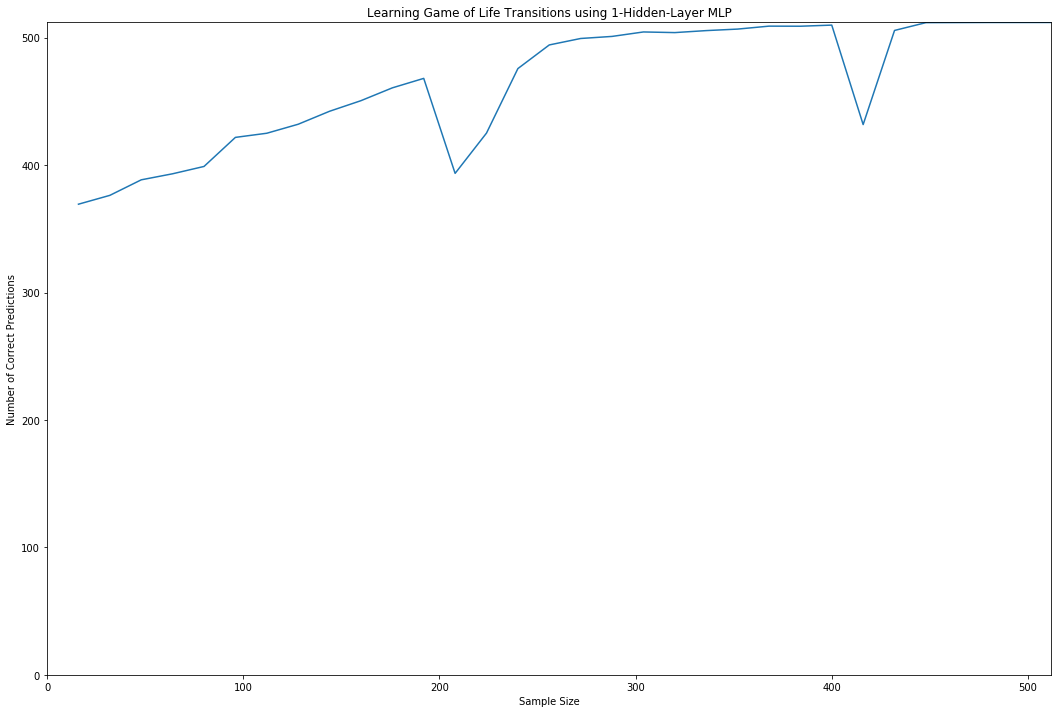

In [10]:
plt.rcParams['figure.figsize'] = [18, 12]
plt.plot(sample_sizes, num_correct)
plt.axis([0, 512, 0, 512])
plt.xlabel('Sample Size')
plt.ylabel('Number of Correct Predictions')
plt.title('Learning Game of Life Transitions using 1-Hidden-Layer MLP')
plt.show()